<a href="https://colab.research.google.com/github/nojha95/Computer_Vision/blob/main/Computer_Vision_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io

Read image from URL 

In [2]:
url_1 = "https://i.kym-cdn.com/photos/images/masonry/001/702/296/f2e.png"

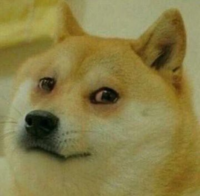

In [3]:
image_1 = io.imread(url_1)
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
cv2_imshow(image_1)

Print dimentions of the image.

In [4]:
height_1, width_1 , channel_1 = image_1.shape

print("Height of image = ",height_1)
print("Width of image = ",width_1)
print("Channel of image = ",channel_1)

Height of image =  196
Width of image =  200
Channel of image =  3


Convert Image into greyscale using OpenCV

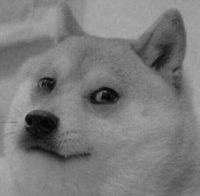

In [5]:
image_2 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_2)

Identify and display value of darkest pixel in both images

In [6]:
min_v_1, max_v_1, min_pt_1, max_pt_1 = cv2.minMaxLoc(image_2)

In [7]:
print("Image 1 Location of Darkest pixel: {} , Value: R,B,G {}".format(min_pt_1,image_1[min_pt_1]))
print("Image 2 Location of Darkest pixel: {} , Value: {}".format(min_pt_1,min_v_1))

Image 1 Location of Darkest pixel: (45, 123) , Value: R,B,G [ 38 117 144]
Image 2 Location of Darkest pixel: (45, 123) , Value: 2.0


Modify the above image by replacing the square (31x31) around darkest pixel with the white pixels.


In [8]:
image_1_modified = np.copy(image_1)
for i in range(min_pt_1[0] - 15 , min_pt_1[0] + 15):
  for j in range(min_pt_1[1] - 15 , min_pt_1[1] + 15):
    image_1_modified[(i,j)] = 255



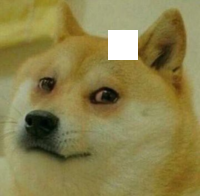

In [9]:
cv2_imshow(image_1_modified)

In [10]:
image_2_modified = np.copy(image_2)
for i in range(min_pt_1[0] - 15 , min_pt_1[0] + 15):
  for j in range(min_pt_1[1] - 15 , min_pt_1[1] + 15):
    image_2_modified[(i,j)] = 255



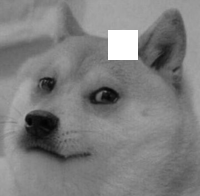

In [11]:
cv2_imshow(image_2_modified)

Find position of pixel with value = 6 in Image 1

In [12]:
c = {0:'B',1:'G',2:'R'}
for i in range(height_1):
  for j in range(width_1):
    for k in range(channel_1):
      if image_1[(i,j,k)] == 6:
        print("Pixel value 6 in y = {}, x = {}, channel = {}".format(i,j,c[k]))

Pixel value 6 in y = 20, x = 173, channel = B
Pixel value 6 in y = 20, x = 174, channel = B
Pixel value 6 in y = 23, x = 175, channel = B
Pixel value 6 in y = 44, x = 146, channel = B
Pixel value 6 in y = 47, x = 165, channel = B
Pixel value 6 in y = 53, x = 138, channel = B
Pixel value 6 in y = 54, x = 162, channel = B
Pixel value 6 in y = 60, x = 155, channel = B
Pixel value 6 in y = 60, x = 157, channel = B
Pixel value 6 in y = 60, x = 159, channel = B
Pixel value 6 in y = 61, x = 156, channel = B
Pixel value 6 in y = 61, x = 158, channel = B
Pixel value 6 in y = 63, x = 157, channel = B
Pixel value 6 in y = 64, x = 154, channel = B
Pixel value 6 in y = 64, x = 157, channel = B
Pixel value 6 in y = 65, x = 154, channel = B
Pixel value 6 in y = 65, x = 160, channel = B
Pixel value 6 in y = 65, x = 162, channel = B
Pixel value 6 in y = 66, x = 159, channel = B
Pixel value 6 in y = 69, x = 157, channel = B
Pixel value 6 in y = 69, x = 174, channel = B
Pixel value 6 in y = 71, x = 174, 

In [13]:
for i in range(height_1):
  for j in range(width_1):
    if image_2[(i,j)] == 6:
      print("Pixel value 6 in y = {}, x = {} ".format(i,j))

Pixel value 6 in y = 97, x = 108 
Pixel value 6 in y = 120, x = 30 
Pixel value 6 in y = 120, x = 44 
Pixel value 6 in y = 120, x = 46 
Pixel value 6 in y = 121, x = 42 
Pixel value 6 in y = 121, x = 43 
Pixel value 6 in y = 121, x = 44 
Pixel value 6 in y = 122, x = 29 
Pixel value 6 in y = 125, x = 44 
Pixel value 6 in y = 125, x = 45 
Pixel value 6 in y = 126, x = 48 


Make a gray square (51X51) with pixel value 100 at the center of this image.

In [14]:
centre_x = image_1.shape[0]//2
centre_y = image_1.shape[1]//2

In [15]:
for i in range(centre_x - 25,centre_x + 25):
  for j in range(centre_y - 25, centre_y + 25):
    image_1_modified[(i,j)] = 100

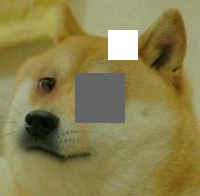

In [16]:
cv2_imshow(image_1_modified)

Compute the average pixel value for each channel R, G, and B then subtract the average value per channel for the above image ( used in q1).

In [17]:
b,g,r = cv2.split(image_1)

In [18]:
avg_b = int(b.mean())
avg_g = int(g.mean())
avg_r = int(r.mean())

In [19]:
image_1_modifed = np.copy(image_1)

for i in range(image_1.shape[0]):
  for j in range(image_1.shape[1]):
    temp = image_1_modifed[(i,j,0)] - avg_b
    if temp < 0:
      image_1_modifed[(i,j,0)] = 0
    else:
      image_1_modifed[(i,j,0)] = temp

for i in range(image_1.shape[0]):
  for j in range(image_1.shape[1]):
    temp = image_1_modifed[(i,j,1)] - avg_g
    if temp < 0:
      image_1_modifed[(i,j,1)] = 0
    else:
      image_1_modifed[(i,j,1)] = temp

for i in range(image_1.shape[0]):
  for j in range(image_1.shape[1]):
    temp = image_1_modifed[(i,j,2)] - avg_r
    if temp < 0:
      image_1_modifed[(i,j,2)] = 0
    else:
      image_1_modifed[(i,j,2)] = temp

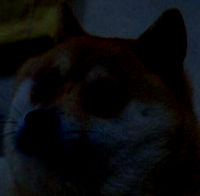

In [20]:
cv2_imshow(image_1_modifed)

Rotate Image 1 30 degree

In [21]:

image_center = (width_1/2, height_1/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

rotation_mat = cv2.getRotationMatrix2D(image_center, 30, 1.)

# rotation calculates the cos and sin, taking absolutes of those.
abs_cos = abs(rotation_mat[0,0]) 
abs_sin = abs(rotation_mat[0,1])

# find the new width and height bounds
bound_w = int(height_1 * abs_sin + width_1 * abs_cos)
bound_h = int(height_1 * abs_cos + width_1 * abs_sin)

# subtract old image center (bringing image back to origo) and adding the new image center coordinates
rotation_mat[0, 2] += bound_w/2 - image_center[0]
rotation_mat[1, 2] += bound_h/2 - image_center[1]

# rotate image with the new bounds and translated rotation matrix
rotated_mat = cv2.warpAffine(image_1, rotation_mat, (bound_w, bound_h))

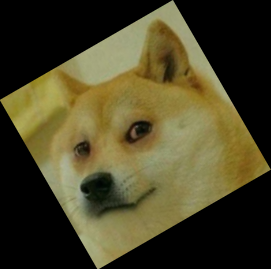

In [22]:
cv2_imshow(rotated_mat)

Resize image 1 to twice its size

In [23]:
resize = cv2.resize(image_1,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

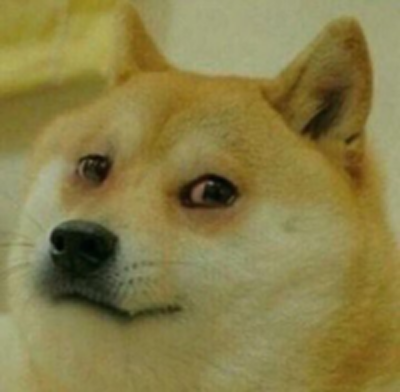

In [24]:
cv2_imshow(resize) 

Shifting (0,0) to (10, 10)

In [25]:
shifted = np.zeros((height_1+10,width_1+10,3))

for i in range(height_1):
  for j in range(width_1):
    for k in range(3):
      shifted[(i+10,j+10,k)] = image_1[(i,j,k)]

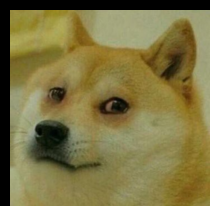

In [26]:
cv2_imshow(shifted)

Filter image for edge detection


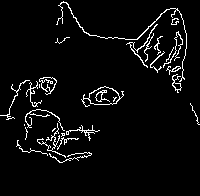

In [27]:
edge_img = cv2.Canny(image_1,40,150)

cv2_imshow(edge_img)